<a href="https://colab.research.google.com/github/Sacrobots/All-ML-Executions/blob/main/S_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# GLD is target
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.shape

(2290, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
print(f"The duplicate values: {data.duplicated().sum()}")

The duplicate values: 0


In [ ]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
data1 = data.drop(['Date'], axis=1)

In [ ]:
correlation = data1.corr()

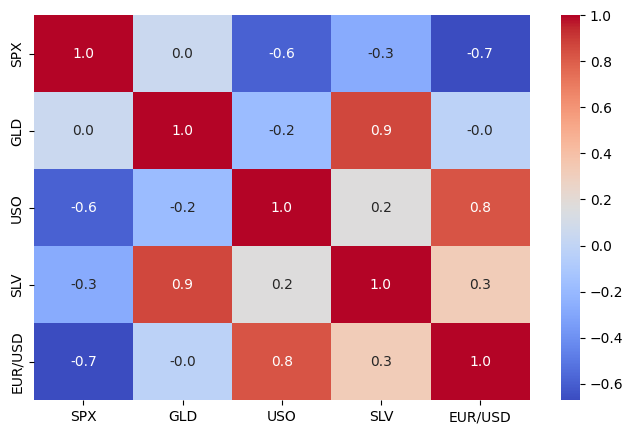

In [ ]:
# Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.1f')
plt.show()

In [ ]:
# Correlation values for GLD

correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


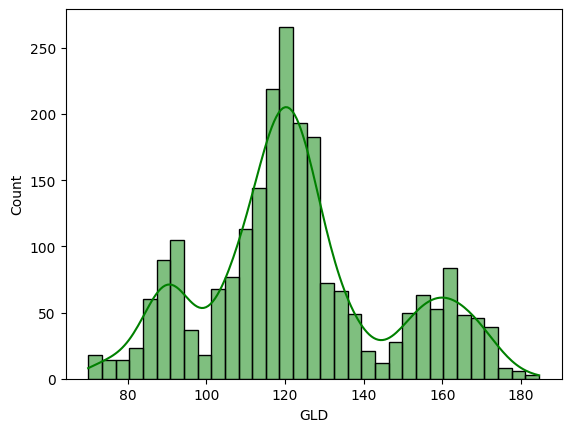

In [ ]:
sns.histplot(data['GLD'], color='green', kde=True)
plt.show()

In [ ]:
X = data1.drop(['GLD'], axis=1)
y = data1['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

# **Model Training: Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# Training the model

regressor.fit(X_train, y_train)

RandomForestRegressor()

# **Model Evaluation**

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([168.66719956,  82.10839992, 115.96809985, 127.7851007 ,
       120.73670176, 154.88369798, 150.49329857, 126.20500008,
       117.36369868, 126.0390009 , 116.66300109, 171.7597009 ,
       141.30289901, 167.79979867, 115.22769983, 117.49730041,
       137.66570391, 170.32740028, 159.05200279, 161.78649894,
       155.12020009, 125.3834999 , 176.26929909, 157.18840332,
       125.16710033,  93.68159987,  77.5913997 , 120.70330017,
       119.09499952, 167.56789875,  88.34920014, 125.24320013,
        90.92410085, 117.71470048, 121.19589927, 136.11270089,
       115.56230113, 114.90990065, 148.18569989, 107.374201  ,
       104.25910253,  87.18099797, 126.39300022, 118.00999998,
       155.3673988 , 119.56939982, 108.43420027, 108.09809811,
        93.13110027, 127.25039733,  75.14630016, 113.73299953,
       121.38570006, 111.11199924, 118.89509914, 120.45609966,
       159.2662997 , 165.92940107, 146.80889627,  85.8970985 ,
        94.25570033,  86.88989885,  90.61950041, 118.77

In [ ]:
error_score = metrics.r2_score(y_pred, y_test)

In [ ]:
print(f'The R2 Score: {error_score*100}')

The R2 Score: 98.99322431624313


In [ ]:
Y_test = list(y_test)

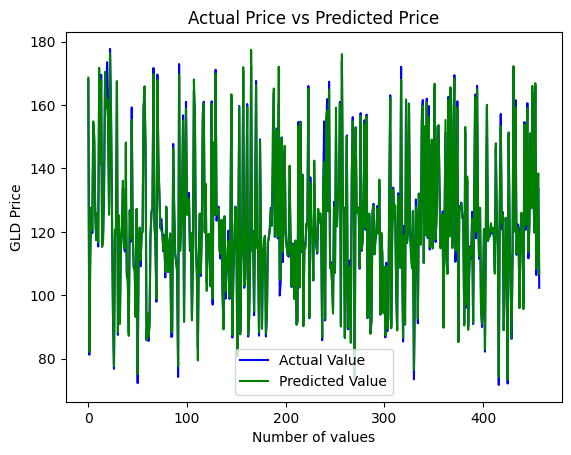

In [ ]:
# Actual vs Predicted prices are almost same so that is why it is overlapping

plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()